In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
gh = pd.read_csv('ghg.csv')
#source = https://ourworldindata.org/grapher/ghg-emissions-by-gas

In [4]:
gh.head(3)

,Entity,Code,Year,Annual nitrous oxide emissions in CO2 equivalents,Annual methane emissions in CO2 equivalents,Annual CO2 emissions
0,Afghanistan,AFG,1850,223767.00,3594926.5,3480800.0
1,Afghanistan,AFG,1851,228426.77,3615134.5,3529653.5
2,Afghanistan,AFG,1852,232966.61,3635346.8,3554080.0


In [5]:
sel = (gh['Entity'] == 'World') & (gh['Year'] >= 1880) & (gh['Year'] <= 2016)
df = gh[sel]

In [6]:
df.head(3)

,Entity,Code,Year,Annual nitrous oxide emissions in CO2 equivalents,Annual methane emissions in CO2 equivalents,Annual CO2 emissions
41310,World,OWID_WRL,1880,252078640.0,1.544128e+09,3.948692e+09
41311,World,OWID_WRL,1881,254855100.0,1.561731e+09,3.973954e+09
41312,World,OWID_WRL,1882,257243630.0,1.579700e+09,4.085563e+09


In [7]:
len(df)

137

In [8]:
corr = pd.read_csv('corr.csv')
len(corr)
#corr.head(3)

137

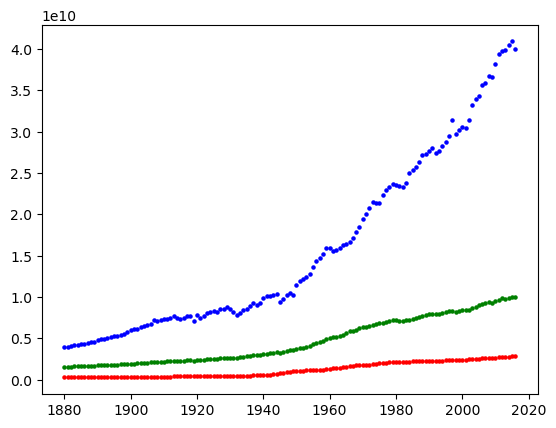

In [9]:
plt.scatter(x=df['Year'], y=df['Annual nitrous oxide emissions in CO2 equivalents'], s= 5, color = 'red')
plt.scatter(x=df['Year'], y=df['Annual methane emissions in CO2 equivalents'], s= 5, color = 'green')
plt.scatter(x=df['Year'], y=df['Annual CO2 emissions'], s= 5, color = 'blue')

In [10]:
merged_df = pd.merge(corr, df, on='Year', how='inner')
merged_df.rename(columns={'Mean': 'Global Temperature'}, inplace=True)
merged_df

,Source,Year,Global Temperature,Decade,Tasa_de_Cambio,Entity,Code,Annual nitrous oxide emissions in CO2 equivalents,Annual methane emissions in CO2 equivalents,Annual CO2 emissions
0,GISTEMP,1880,-0.20,1880,NaN,World,OWID_WRL,2.520786e+08,1.544128e+09,3.948692e+09
1,GISTEMP,1881,-0.12,1880,0.008,World,OWID_WRL,2.548551e+08,1.561731e+09,3.973954e+09
2,GISTEMP,1882,-0.10,1880,0.002,World,OWID_WRL,2.572436e+08,1.579700e+09,4.085563e+09
3,GISTEMP,1883,-0.21,1880,-0.011,World,OWID_WRL,2.593222e+08,1.599338e+09,4.205575e+09
4,GISTEMP,1884,-0.28,1880,-0.007,World,OWID_WRL,2.611689e+08,1.611313e+09,4.236491e+09
...,...,...,...,...,...,...,...,...,...,...
132,GISTEMP,2012,0.63,2010,0.003,World,OWID_WRL,2.771783e+09,9.812516e+09,3.980888e+10
133,GISTEMP,2013,0.65,2010,0.002,World,OWID_WRL,2.760305e+09,9.800974e+09,3.992178e+10
134,GISTEMP,2014,0.74,2010,0.009,World,OWID_WRL,2.789930e+09,9.893349e+09,4.047206e+10
135,GISTEMP,2015,0.87,2010,0.013,World,OWID_WRL,2.799329e+09,9.941571e+09,4.091958e+10


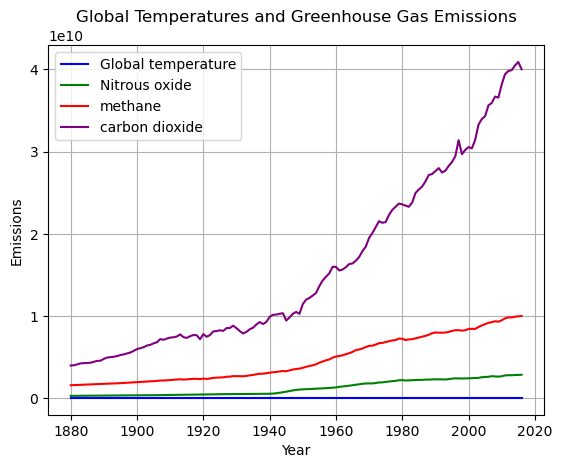

In [11]:
plt.plot(merged_df['Year'], merged_df['Global Temperature'], label='Global temperature', color='blue')

# Graficar las emisiones de los diferentes gases
plt.plot(merged_df['Year'], merged_df['Annual nitrous oxide emissions in CO2 equivalents'], label='Nitrous oxide', color='green')
plt.plot(merged_df['Year'], merged_df['Annual methane emissions in CO2 equivalents'], label='methane', color='red')
plt.plot(merged_df['Year'], merged_df['Annual CO2 emissions'], label='carbon dioxide', color='purple')

# Etiquetas y título del gráfico
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Global Temperatures and Greenhouse Gas Emissions')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Estandarizacion

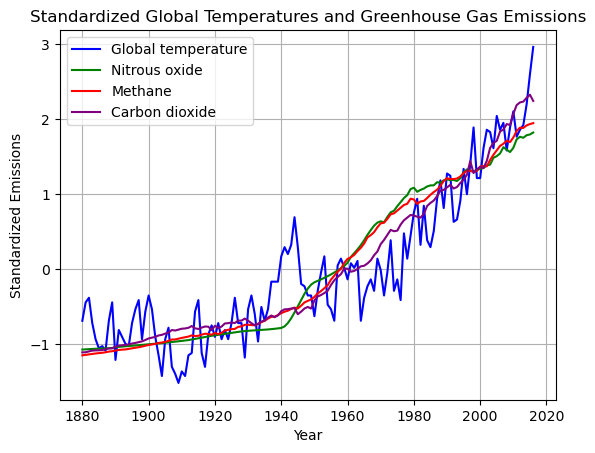

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Suponiendo que tu DataFrame se llama 'merged_df'
# Si no tienes las librerías instaladas, puedes hacerlo con:
# pip install pandas matplotlib scikit-learn

# Seleccionar las columnas relevantes para la estandarización
data_to_standardize = merged_df[['Global Temperature', 
                                 'Annual nitrous oxide emissions in CO2 equivalents', 
                                 'Annual methane emissions in CO2 equivalents', 
                                 'Annual CO2 emissions']]

# Estandarización z-score
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_standardize)

# Crear un nuevo DataFrame con los datos estandarizados
standardized_df = pd.DataFrame(standardized_data, columns=data_to_standardize.columns)

# Graficar los datos estandarizados
plt.plot(merged_df['Year'], standardized_df['Global Temperature'], label='Global temperature', color='blue')
plt.plot(merged_df['Year'], standardized_df['Annual nitrous oxide emissions in CO2 equivalents'], label='Nitrous oxide', color='green')
plt.plot(merged_df['Year'], standardized_df['Annual methane emissions in CO2 equivalents'], label='Methane', color='red')
plt.plot(merged_df['Year'], standardized_df['Annual CO2 emissions'], label='Carbon dioxide', color='purple')

# Etiquetas y título del gráfico
plt.xlabel('Year')
plt.ylabel('Standardized Emissions')
plt.title('Standardized Global Temperatures and Greenhouse Gas Emissions')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


# Normalizacion

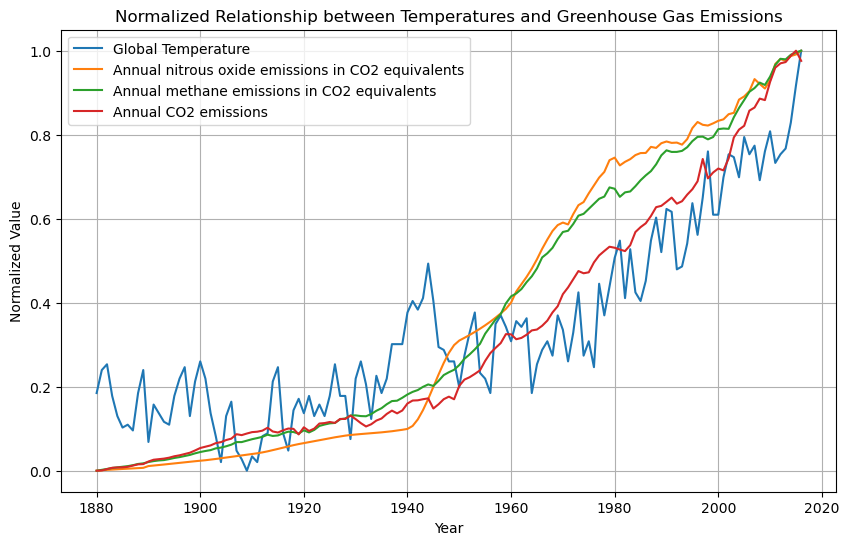

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Normalizar las columnas que deseas trazar
cols_to_normalize = ['Global Temperature', 'Annual nitrous oxide emissions in CO2 equivalents', 
                    'Annual methane emissions in CO2 equivalents', 'Annual CO2 emissions']
df_normalized = merged_df.copy()  # Crear una copia del DataFrame original
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar las columnas normalizadas
for col in cols_to_normalize:
    plt.plot(df_normalized['Year'], df_normalized[col], label=col)

# Etiquetas y título del gráfico
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Normalized Relationship between Temperatures and Greenhouse Gas Emissions')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


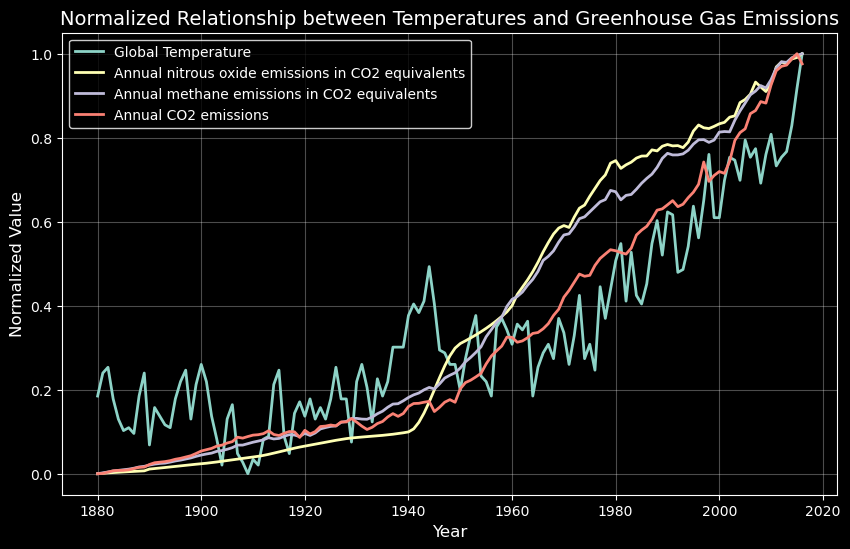

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Normalizar las columnas que deseas trazar
cols_to_normalize = ['Global Temperature', 'Annual nitrous oxide emissions in CO2 equivalents', 
                    'Annual methane emissions in CO2 equivalents', 'Annual CO2 emissions']
df_normalized = merged_df.copy()  # Crear una copia del DataFrame original
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])

# Cambiar el estilo del fondo
plt.style.use('dark_background')

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar las columnas normalizadas
for col in cols_to_normalize:
    plt.plot(df_normalized['Year'], df_normalized[col], label=col, linewidth=2)

# Etiquetas y título del gráfico
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.title('Normalized Relationship between Temperatures and Greenhouse Gas Emissions', fontsize=14)
plt.legend(fontsize=10)

# Cambiar colores y estilo de los ejes
plt.tick_params(axis='both', which='both', labelsize=10, colors='white')

# Cambiar el color de fondo de las etiquetas de los ejes
ax = plt.gca()
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Cambiar el color de fondo de la leyenda
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('black')
frame.set_edgecolor('white')

# Mostrar el gráfico
plt.grid(True, alpha=0.3)
plt.show()


# CORRELATION

In [15]:
merged_df

,Source,Year,Global Temperature,Decade,Tasa_de_Cambio,Entity,Code,Annual nitrous oxide emissions in CO2 equivalents,Annual methane emissions in CO2 equivalents,Annual CO2 emissions
0,GISTEMP,1880,-0.20,1880,NaN,World,OWID_WRL,2.520786e+08,1.544128e+09,3.948692e+09
1,GISTEMP,1881,-0.12,1880,0.008,World,OWID_WRL,2.548551e+08,1.561731e+09,3.973954e+09
2,GISTEMP,1882,-0.10,1880,0.002,World,OWID_WRL,2.572436e+08,1.579700e+09,4.085563e+09
3,GISTEMP,1883,-0.21,1880,-0.011,World,OWID_WRL,2.593222e+08,1.599338e+09,4.205575e+09
4,GISTEMP,1884,-0.28,1880,-0.007,World,OWID_WRL,2.611689e+08,1.611313e+09,4.236491e+09
...,...,...,...,...,...,...,...,...,...,...
132,GISTEMP,2012,0.63,2010,0.003,World,OWID_WRL,2.771783e+09,9.812516e+09,3.980888e+10
133,GISTEMP,2013,0.65,2010,0.002,World,OWID_WRL,2.760305e+09,9.800974e+09,3.992178e+10
134,GISTEMP,2014,0.74,2010,0.009,World,OWID_WRL,2.789930e+09,9.893349e+09,4.047206e+10
135,GISTEMP,2015,0.87,2010,0.013,World,OWID_WRL,2.799329e+09,9.941571e+09,4.091958e+10


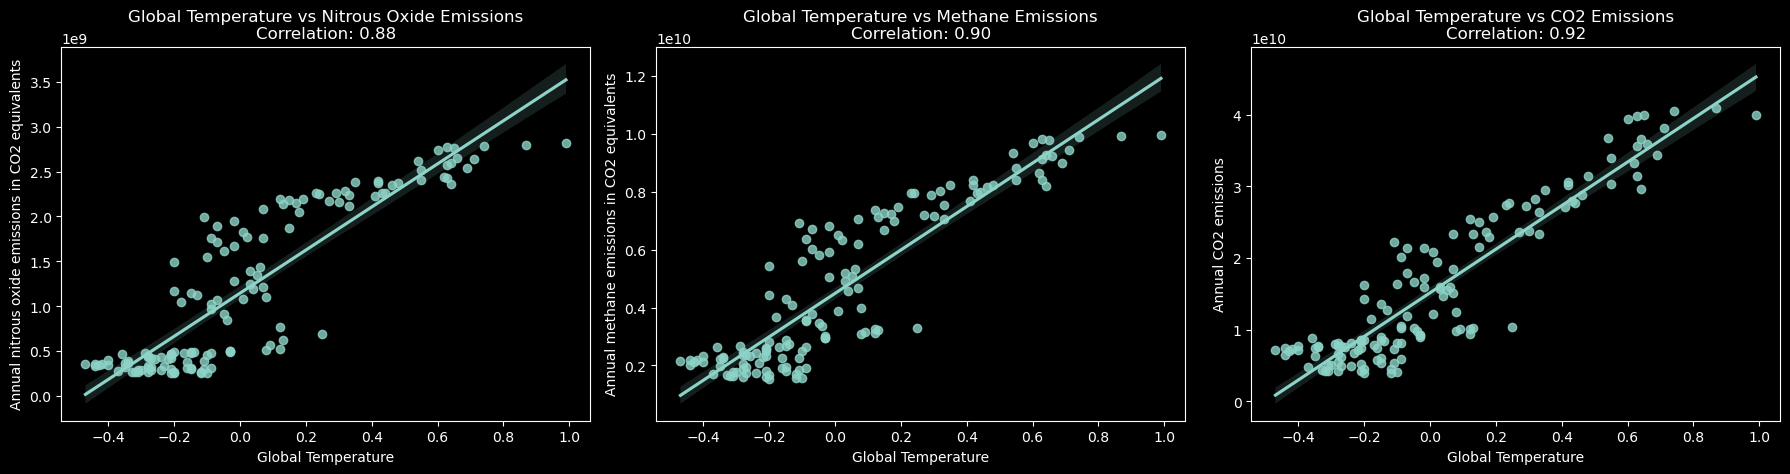

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.regplot(x='Global Temperature', y='Annual nitrous oxide emissions in CO2 equivalents', data=merged_df)
correlation_1 = merged_df['Global Temperature'].corr(merged_df['Annual nitrous oxide emissions in CO2 equivalents'])
plt.title(f'Global Temperature vs Nitrous Oxide Emissions\nCorrelation: {correlation_1:.2f}')

plt.subplot(1, 3, 2)
sns.regplot(x='Global Temperature', y='Annual methane emissions in CO2 equivalents', data=merged_df)
correlation_2 = merged_df['Global Temperature'].corr(merged_df['Annual methane emissions in CO2 equivalents'])
plt.title(f'Global Temperature vs Methane Emissions\nCorrelation: {correlation_2:.2f}')

plt.subplot(1, 3, 3)
sns.regplot(x='Global Temperature', y='Annual CO2 emissions', data=merged_df)
correlation_3 = merged_df['Global Temperature'].corr(merged_df['Annual CO2 emissions'])
plt.title(f'Global Temperature vs CO2 Emissions\nCorrelation: {correlation_3:.2f}')

plt.tight_layout()
plt.show()


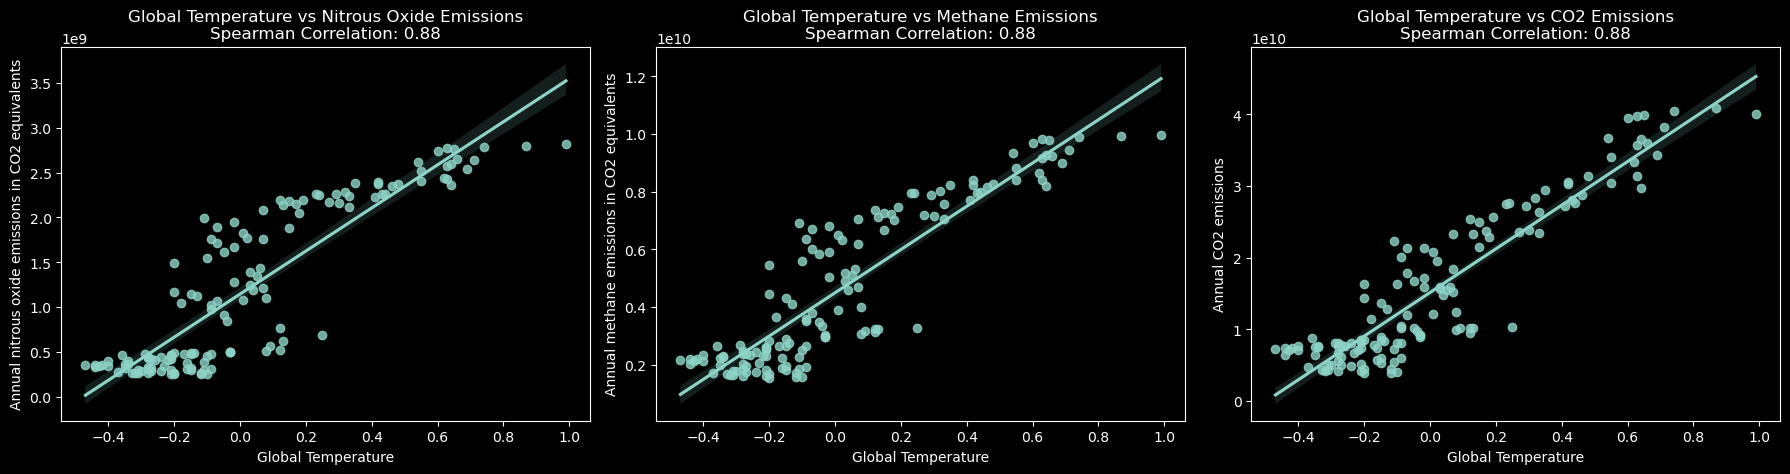

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado 'merged_df' con las columnas apropiadas

# Crear una figura con tres subplots en una fila
plt.figure(figsize=(18, 5))

# Subplot 1: Gráfico de dispersión y regresión lineal para Nitrous Oxide Emissions
plt.subplot(1, 3, 1)
sns.regplot(x='Global Temperature', y='Annual nitrous oxide emissions in CO2 equivalents', data=merged_df)
correlation_1 = merged_df['Global Temperature'].corr(merged_df['Annual nitrous oxide emissions in CO2 equivalents'], method='spearman')
plt.title(f'Global Temperature vs Nitrous Oxide Emissions\nSpearman Correlation: {correlation_1:.2f}')

# Subplot 2: Gráfico de dispersión y regresión lineal para Methane Emissions
plt.subplot(1, 3, 2)
sns.regplot(x='Global Temperature', y='Annual methane emissions in CO2 equivalents', data=merged_df)
correlation_2 = merged_df['Global Temperature'].corr(merged_df['Annual methane emissions in CO2 equivalents'], method='spearman')
plt.title(f'Global Temperature vs Methane Emissions\nSpearman Correlation: {correlation_2:.2f}')

# Subplot 3: Gráfico de dispersión y regresión lineal para CO2 Emissions
plt.subplot(1, 3, 3)
sns.regplot(x='Global Temperature', y='Annual CO2 emissions', data=merged_df)
correlation_3 = merged_df['Global Temperature'].corr(merged_df['Annual CO2 emissions'], method='spearman')
plt.title(f'Global Temperature vs CO2 Emissions\nSpearman Correlation: {correlation_3:.2f}')

# Ajustar el diseño y mostrar los subplots
plt.tight_layout()
plt.show()


In [18]:
gas = merged_df[['Global Temperature','Annual nitrous oxide emissions in CO2 equivalents', 'Annual methane emissions in CO2 equivalents', 'Annual CO2 emissions' ]]

In [19]:
import scipy.stats
correlation_data = []
for column in gas.columns:
    if column != 'Year':
        corr, p_value = scipy.stats.pearsonr(gas['Global Temperature'], gas[column])
        correlation_data.append({
            'Gas': column,
            'Correlation': corr,
            'p-value': p_value
        })

correlation_df = pd.DataFrame(correlation_data)

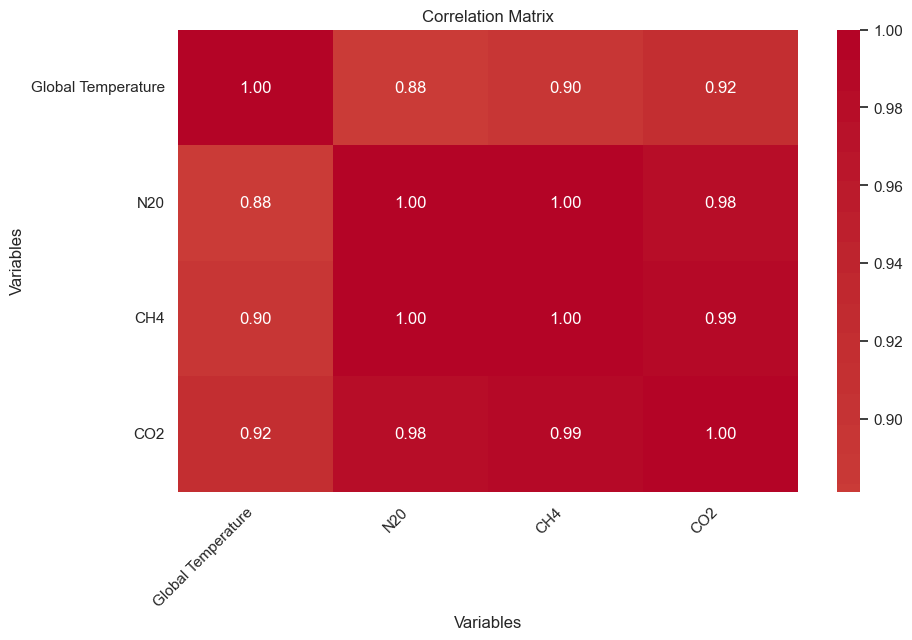

In [25]:
# Calcular la matriz de correlación
correlation_matrix = gas.corr()

# Establecer estilo
import seaborn as sns
sns.set(style="white")

# Generar el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Matrix")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.xticks([0.5, 1.5, 2.5, 3.5], ['Global Temperature', 'N20', 'CH4', 'CO2'], rotation=45, ha='right')
plt.yticks([0.5, 1.5, 2.5, 3.5], ['Global Temperature', 'N20', 'CH4', 'CO2'])
plt.show()


In [ ]:
gases = merged_df[['Global Temperature','Annual nitrous oxide emissions in CO2 equivalents', 'Annual methane emissions in CO2 equivalents', 'Annual CO2 emissions', 'Year']]
gases

,Global Temperature,Annual nitrous oxide emissions in CO2 equivalents,Annual methane emissions in CO2 equivalents,Annual CO2 emissions,Year
0,-0.20,2.520786e+08,1.544128e+09,3.948692e+09,1880
1,-0.12,2.548551e+08,1.561731e+09,3.973954e+09,1881
2,-0.10,2.572436e+08,1.579700e+09,4.085563e+09,1882
3,-0.21,2.593222e+08,1.599338e+09,4.205575e+09,1883
4,-0.28,2.611689e+08,1.611313e+09,4.236491e+09,1884
...,...,...,...,...,...
132,0.63,2.771783e+09,9.812516e+09,3.980888e+10,2012
133,0.65,2.760305e+09,9.800974e+09,3.992178e+10,2013
134,0.74,2.789930e+09,9.893349e+09,4.047206e+10,2014
135,0.87,2.799329e+09,9.941571e+09,4.091958e+10,2015


# GDP

In [ ]:
gdp = pd.read_csv('gdp.csv')
gdp.head(3)

,Entity,Code,Year,GDP,417484-annotations
0,Afghanistan,AFG,1950,9421400000,NaN
1,Afghanistan,AFG,1951,9692280000,NaN
2,Afghanistan,AFG,1952,10017325000,NaN


In [ ]:
x = gdp['Entity'] == 'World'
gdpglobal = gdp[x]
hello = gdpglobal['Year'] >= 1880
growth = gdpglobal[hello]
gpd = growth[['Year', 'GDP']]

In [ ]:
total = pd.merge(gases, gpd, on='Year', how='inner')
total

,Global Temperature,Annual nitrous oxide emissions in CO2 equivalents,Annual methane emissions in CO2 equivalents,Annual CO2 emissions,Year,GDP
0,-0.09,3.131318e+08,1.919402e+09,5.947649e+09,1900,3405759000000
1,-0.27,4.209537e+08,2.355906e+09,7.770820e+09,1920,4318420500000
2,0.08,5.079132e+08,3.074403e+09,9.864946e+09,1940,6992597000000
3,-0.18,1.048694e+09,3.665153e+09,1.141997e+10,1950,8408477500000
4,-0.02,1.280580e+09,5.043982e+09,1.595456e+10,1960,13245837000000
5,0.02,1.770751e+09,6.336593e+09,1.948934e+10,1970,21814451000000
6,0.27,2.168084e+09,7.204004e+09,2.357557e+10,1980,31880978000000
7,0.44,2.266903e+09,7.975282e+09,2.761898e+10,1990,43018246000000
8,0.42,2.393431e+09,8.400780e+09,3.054921e+10,2000,59866660000000
9,0.71,2.641035e+09,9.454867e+09,3.817824e+10,2010,89807300000000


### Dispersion Plot

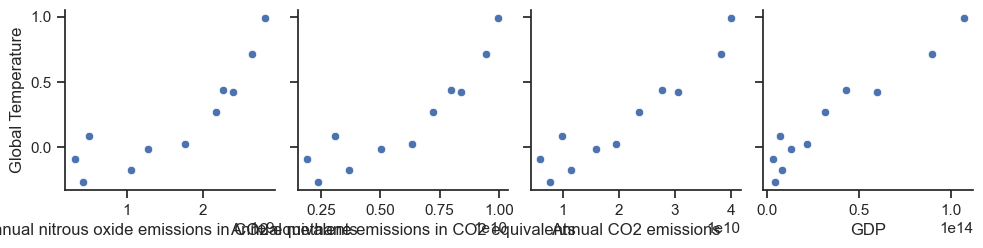

In [ ]:
sns.set(style="ticks")
sns.pairplot(total, x_vars=["Annual nitrous oxide emissions in CO2 equivalents", "Annual methane emissions in CO2 equivalents", "Annual CO2 emissions", "GDP"],
             y_vars=["Global Temperature"], kind="scatter")

plt.show()

# Plot Normalitzation

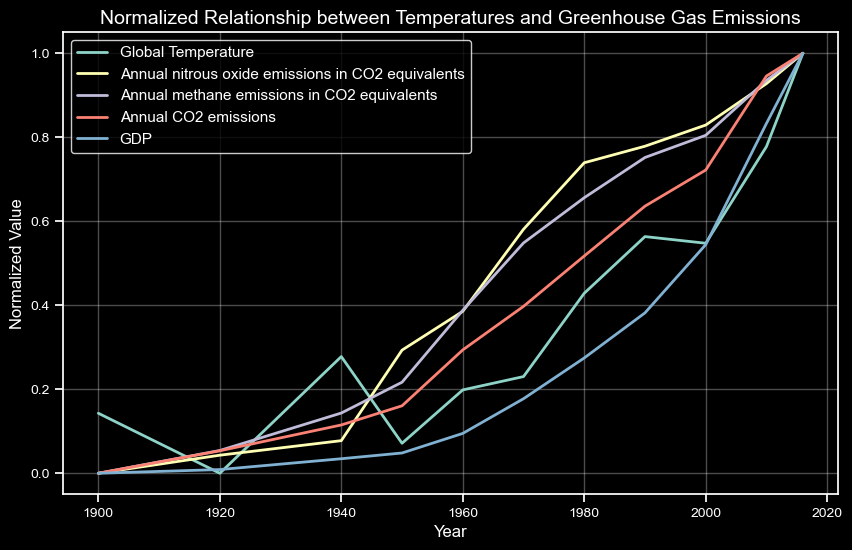

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Normalizar las columnas que deseas trazar
cols_to_normalize = ['Global Temperature', 'Annual nitrous oxide emissions in CO2 equivalents', 
                    'Annual methane emissions in CO2 equivalents', 'Annual CO2 emissions', 'GDP']
df_normalized = total.copy()  # Crear una copia del DataFrame original
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])

# Cambiar el estilo del fondo
plt.style.use('dark_background')

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar las columnas normalizadas
for col in cols_to_normalize:
    plt.plot(df_normalized['Year'], df_normalized[col], label=col, linewidth=2)

# Etiquetas y título del gráfico
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.title('Normalized Relationship between Temperatures and Greenhouse Gas Emissions', fontsize=14)
plt.legend(fontsize=10)

# Cambiar colores y estilo de los ejes
plt.tick_params(axis='both', which='both', labelsize=10, colors='white')

# Cambiar el color de fondo de las etiquetas de los ejes
ax = plt.gca()
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Cambiar el color de fondo de la leyenda
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('black')
frame.set_edgecolor('white')

# Mostrar el gráfico
plt.grid(True, alpha=0.3)
plt.show()